In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

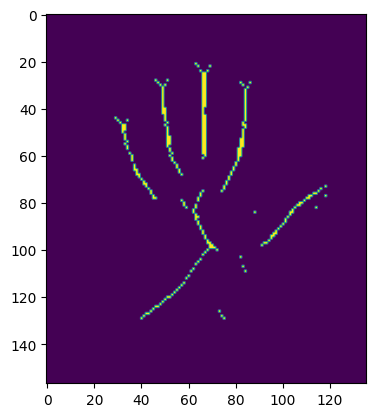

In [2]:
image = cv2.imread('img1.jpg', cv2.IMREAD_GRAYSCALE)
img = image.copy()
for counter in range(256):
    img[image == counter] = 255 - counter
    img[image == 255-counter] = counter



params = []
size = np.size(img)
skel = np.zeros(img.shape,np.uint8)
 
ret,img = cv2.threshold(img,127,255,0)
element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
done = False
 
while( not done):
    eroded = cv2.erode(img,element)
    temp = cv2.dilate(eroded,element)
    temp = cv2.subtract(img,temp)
    skel = cv2.bitwise_or(skel,temp)
    img = eroded.copy()
 
    zeros = size - cv2.countNonZero(img)
    if zeros==size:
        done = True
 
plt.imshow(skel)

In [4]:
def erode(A,B):
    m,n= A.shape 
    constant= 1
    imgErode= np.zeros((m,n), dtype=np.uint8)
    for i in range(constant, m-constant):
        for j in range(constant,n-constant):
            temp= A[i-constant:i+constant+1, j-constant:j+constant+1]
            product= temp*B
            MinHold = 255
            for x in range (B.shape[0]):
                for y in range (B.shape[1]):
                    if B[x,y] !=0:
                        if product[x,y] < MinHold:
                            MinHold = product[x,y]
            imgErode[i,j]= MinHold

    return imgErode


def dilate(A,B):
    m,n= A.shape 
    constant= 1
    imgErode= np.zeros((m,n), dtype=np.uint8)
    for i in range(constant, m-constant):
        for j in range(constant,n-constant):
            temp= A[i-constant:i+constant+1, j-constant:j+constant+1]
            product= temp*B
            MaxHold = 0
            for x in range (B.shape[0]):
                for y in range (B.shape[1]):
                    if B[x,y] !=0:
                        if product[x,y] > MaxHold:
                            MaxHold = product[x,y]
            imgErode[i,j]= MaxHold


    return imgErode
            

def Sk(A,B,k):
    if k == 0:
        return A
    else:
        return Sk(erode(A, B),B,k-1)



In [5]:
def get_skeleton(image):
    res = image.copy()
    params = []

    for counter in range(256):
        res[image == counter] = 255 - counter
        res[image == 255-counter] = counter

    res[res<=127] = 0
    res[res>127] = 1
    
    unique, counts = np.unique(res, return_counts=True)
    pxl_count = dict(zip(unique, counts))
    print(pxl_count)
    # res[70,70] = 0
    # plt.imshow(res) 
    
    
    B = np.array((
        [0,1,0],
        [1,1,1],
        [0,1,0],
    ), dtype=np.uint8)


    while(True):
        if len(params) == 0:
            params.append(res-dilate(erode(res,B),B))
        else:
            hold = erode(res,B)
            out = hold - dilate(erode(hold,B),B)
            if (np.all(hold==0)):
                break
            else:
                res = hold.copy()
                params.append(out)

    output = np.zeros(res.shape, dtype="uint8")
    for item in params:
        for x in range(item.shape[0]):
            for y in range(item.shape[1]):
                if item[x,y] == 1:
                    output[x,y] = 1


    plt.imshow(output)    


{0: 16082, 1: 5270}


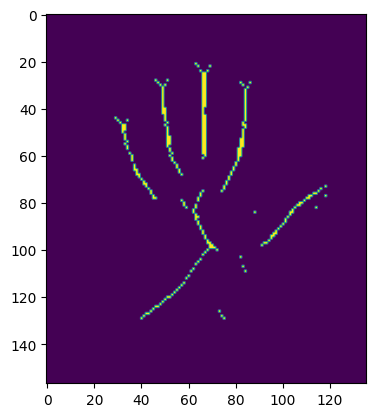

In [6]:
get_skeleton(cv2.imread('img1.jpg', cv2.IMREAD_GRAYSCALE))